# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


# Reading the Dataset

**For training, we will take not all brands of cars, but one. For example, Ford.**

In [3]:
data = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv')

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17811 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17811 non-null  object 
 1   year          17811 non-null  int64  
 2   price         17811 non-null  int64  
 3   transmission  17811 non-null  object 
 4   mileage       17811 non-null  int64  
 5   fuelType      17811 non-null  object 
 6   tax           17811 non-null  int64  
 7   mpg           17811 non-null  float64
 8   engineSize    17811 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [7]:
data.nunique()

model              23
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                35
mpg                90
engineSize         16
dtype: int64

In [8]:
data.iloc[0]

model              Fiesta
year                 2017
price               12000
transmission    Automatic
mileage             15944
fuelType           Petrol
tax                   150
mpg                  57.7
engineSize            1.0
Name: 0, dtype: object

**<li>model, transmission, fuelType -categorical (text) variables  >>>>   get_dummies**
**<li>year, price, mileage, tax, mpg, engineSize - continuous variables    >>>>   no changes**

# Data preparation and analysis

## Removing spaces, lowercase letters

In [9]:
data.model.unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo'], dtype=object)

In [10]:
data.model = data.model.str.strip().str.lower().str.replace(' ', '')

In [11]:
data.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [12]:
data.transmission = data.transmission.str.lower()

In [13]:
data.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [14]:
data.fuelType = data.fuelType.str.lower()

## year

In [15]:
data.year.unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060])

In [16]:
data.year = 2021 - data.year

In [17]:
data = data[~(data['year'] == -39)]

In [18]:
data.year.unique()

array([ 4,  3,  2,  6,  7,  5,  8,  1,  9, 13, 11, 12, 10, 23, 14, 16, 15,
       19, 18, 25, 17, 21])

**We will change the value of the variable to the age of the car, we will take 2021 as the countdown**

<AxesSubplot:>

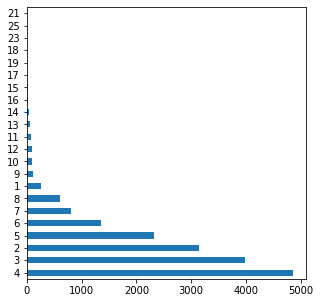

In [19]:
data['year'].value_counts().plot.barh(figsize=(5, 5))

## model

In [20]:
data.model.value_counts()

fiesta                 6508
focus                  4555
kuga                   2208
ecosport               1127
c-max                   542
ka+                     523
mondeo                  512
b-max                   350
s-max                   294
grandc-max              247
galaxy                  227
edge                    205
ka                      197
puma                     79
tourneocustom            69
mustang                  57
grandtourneoconnect      57
tourneoconnect           32
fusion                   16
streetka                  2
ranger                    1
escort                    1
transittourneo            1
Name: model, dtype: int64

In [21]:
data.groupby('model')['price'].agg(['count', 'mean']).sort_values('count', ascending=True)

,count,mean
model,,
transittourneo,1,12450.000000
ranger,1,14495.000000
escort,1,3000.000000
streetka,2,1924.500000
fusion,16,2555.812500
tourneoconnect,32,13862.406250
mustang,57,34631.263158
grandtourneoconnect,57,14765.456140
tourneocustom,69,21165.985507


**`Fiesta`, `focus`, and `kuga` models represent 75% of all cars in the dataset. I wanted to create a separate category for unpopular models - `other`, but grouping by models showed that they differ greatly in price. And it's easier to split each model into 1/0 columns in order to 'feed' it to the algorithm - we don't have to count manually )**

## fuelType

In [22]:
data.fuelType.value_counts()

petrol      12079
diesel       5706
hybrid         22
electric        2
other           1
Name: fuelType, dtype: int64

In [23]:
data.groupby('fuelType')['price'].agg(['count', 'mean'])

,count,mean
fuelType,,
diesel,5706,13642.600946
electric,2,15737.500000
hybrid,22,22149.090909
other,1,13800.000000
petrol,12079,11603.055468


In [24]:
data[data['fuelType'] == 'electric']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6385,mondeo,5,15975,automatic,9396,electric,0,67.3,2.0
11959,mondeo,5,15500,automatic,24531,electric,0,67.3,2.0


In [25]:
data[data['fuelType'] == 'other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17492,mondeo,6,13800,automatic,19470,other,0,67.3,2.0


In [26]:
data['fuelType'].replace('other', 'electric', inplace=True)

**Let's add an element from the `other` category to `electric` - they have the same `model`, `transmission`, `tax`, `mpg` and `engineSize`**

In [27]:
data.fuelType.value_counts()

petrol      12079
diesel       5706
hybrid         22
electric        3
Name: fuelType, dtype: int64

<AxesSubplot:>

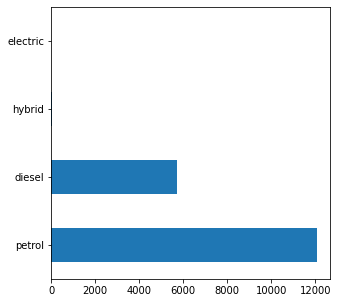

In [28]:
data['fuelType'].value_counts().plot.barh(figsize=(5, 5))

## price

<AxesSubplot:>

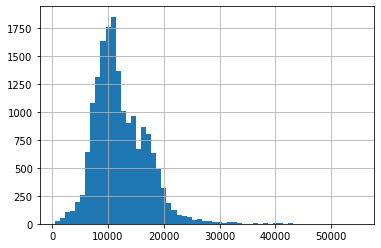

In [29]:
data.price.hist(bins=60)

**I don't like outliers after 30000, let's see what they include**

<AxesSubplot:xlabel='price', ylabel='model'>

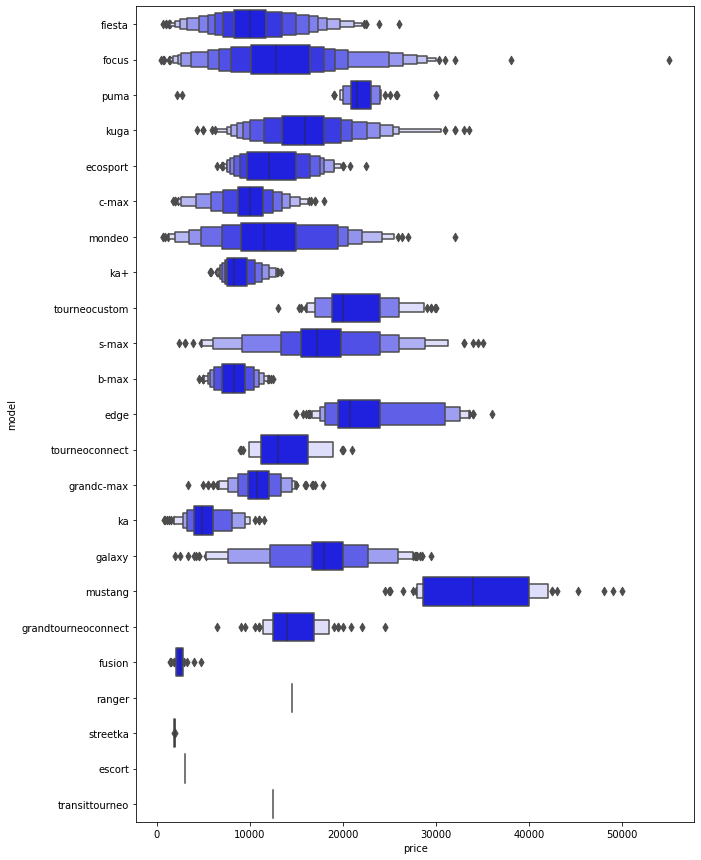

In [30]:
plt.figure(figsize=(10,15))
sns.boxenplot(x="price", y="model",
              color="b",
              scale="linear", data=data)

**The graph shows that all `mustang` models fall into these outliers, if we remove them, the algorithm will not predict their cost.**

In [31]:
print('Mustang models:', len(data[data['model'] == 'mustang']))
print('Percentage of mustang models:', round(len(data[data['model'] =='mustang'])*100/len(data), 2), '%')

Mustang models: 57
Percentage of mustang models: 0.32 %


In [32]:
data_mean, data_std = np.mean(data.price), np.std(data.price)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [33]:
print('Outliers:', len(data[~data['price'].between(lower, upper)]))
print('Percentage of emissions:', round(len(data[~data['price'].between(lower, upper)])*100/len(data), 2), '%')

Outliers: 176
Percentage of emissions: 0.99 %


In [34]:
data = data[data['price'].between(lower, upper)]

**There are very few mustangs in the dataset - 99.68% of other Ford models. A third of the outliers are mustangs, the rest are other models. If we leave the mustangs, they will correlate very strongly with the price, overshadowing other signs in our training. So let's remove all outliers. The price distribution is close to the normal distribution, so we use 3 standard deviations to remove outliers.**

## transmission

In [35]:
data.transmission.value_counts()

manual       15319
automatic     1296
semi-auto     1019
Name: transmission, dtype: int64

**Most of it is `manual` transmission**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17634 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17634 non-null  object 
 1   year          17634 non-null  int64  
 2   price         17634 non-null  int64  
 3   transmission  17634 non-null  object 
 4   mileage       17634 non-null  int64  
 5   fuelType      17634 non-null  object 
 6   tax           17634 non-null  int64  
 7   mpg           17634 non-null  float64
 8   engineSize    17634 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


In [37]:
data = pd.get_dummies(data)

**Let's apply the `get_dummies` method to the features `model`, `transmission`, `FuelType`**

In [38]:
data

,year,price,mileage,tax,mpg,engineSize,model_b-max,model_c-max,model_ecosport,model_edge,...,model_tourneoconnect,model_tourneocustom,model_transittourneo,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol
0,4,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,5,7999,31348,125,54.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17961,4,8999,16700,150,47.1,1.4,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,7,7499,40700,30,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,6,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


**We removed outliers, applied the `get_dummies` method to text (categorical) variables, and replaced the `year`.**  
  
**In total, we have 17634 elements and 36 variables.**

# Training the model

## Correlation

In [39]:
pd.DataFrame(data.corr()['price'].abs()).sort_values('price').T

,model_transittourneo,model_ranger,model_mondeo,fuelType_electric,model_escort,model_tourneoconnect,model_ecosport,model_streetka,model_grandc-max,model_grandtourneoconnect,...,fuelType_petrol,transmission_manual,mpg,engineSize,model_kuga,model_fiesta,tax,mileage,year,price
price,0.000651,0.00422,0.004582,0.009114,0.015841,0.017644,0.023767,0.025058,0.033014,0.035483,...,0.210946,0.22009,0.319333,0.321962,0.322776,0.334169,0.419983,0.546682,0.672069,1.0


**Let's build a correlation matrix, transpose it so that it is convenient to read. Variables with low correlation can be deleted now, but let's leave them to delete them at the stage of regression analysis.**

## Regression analysis

In [40]:
X = data.drop(['price'], axis=1)
y = data.price
model_OLS = sm.OLS(y, X).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     3103.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:39:36   Log-Likelihood:            -1.5592e+05
No. Observations:               17634   AIC:                         3.119e+05
Df Residuals:                   17601   BIC:                         3.122e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
year                      -1094.1352      9.929   -110.192      0.000   -1113.598   -1074.673
mileage                      -0.0596      0.001    -59.564      0.000      -0.062      -0.058
tax                          -0.4448      0.265     -1.680      0.093      -0.964       0.074
mpg                         -95.0571      2.759    -34.450      0.000    -100.466     -89.649
engineSize                 2064.2864     73.818     27.965      0.000    1919.597    2208.976
model_b-max               -2309.8158    163.950    -14.089      0.000   -2631.175   -1988.457
model_c-max               -1241.7059    154.020     -8.062      0.000   -1543.601    -939.811
model_ecosport             -756.5132    146.614     -5.160      0.000   -1043.890    -469.136
model_edge                 5447.2831    186.927     29.141      0.000    5080.888    5813.678
model_escort                1.23e+04   1622.420      7.584      0.000    9124.800    1.55e+04
model_fiesta              -1101.6432    145.322     -7.581      0.000   -1386.489    -816.798
model_focus                 865.4839    142.592      6.070      0.000     585.990    1144.978
model_fusion               1045.2634    427.836      2.443      0.015     206.663    1883.864
model_galaxy               4156.2799    175.921     23.626      0.000    3811.458    4501.102
model_grandc-max           -860.9272    171.006     -5.034      0.000   -1196.116    -525.738
model_grandtourneoconnect  1531.1672    253.551      6.039      0.000    1034.183    2028.151
model_ka                  -2841.4751    182.725    -15.551      0.000   -3199.635   -2483.316
model_ka+                 -5213.0790    157.320    -33.137      0.000   -5521.442   -4904.716
model_kuga                 1328.5245    140.792      9.436      0.000    1052.559    1604.490
model_mondeo                702.1669    157.456      4.459      0.000     393.538    1010.796
model_mustang              6905.2041    744.075      9.280      0.000    5446.744    8363.664
model_puma                 5605.0937    229.410     24.433      0.000    5155.428    6054.759
model_ranger               3273.1620   1615.010      2.027      0.043     107.582    6438.742
model_s-max                3648.5030    167.720     21.754      0.000    3319.756    3977.250
model_streetka             2469.0896   1147.399      2.152      0.031     220.074    4718.105
model_tourneoconnect        770.3843    315.593      2.441      0.015     151.791    1388.977
model_tourneocustom        3637.8330    249.821     14.562      0.000    3148.159    4127.507
model_transittourneo       -568.7349   1612.964     -0.353      0.724   -3730.304    2592.834
transmission_automatic     1.311e+04    209.079     62.710      0.000    1.27e+04    1.35e+04
transmission_manual        1.277e+04    215.075     59.369      0.000    1.

**Pay attention to `R-squared` and `Adj. R-squared` - they show how well the independent variables predict the target variable price. The maximum value is 1.**

In [41]:
print('R-squared', model_OLS.rsquared)
print('Adj. R-squared', model_OLS.rsquared_adj)

R-squared 0.8494300252753217
Adj. R-squared 0.849156277238779


In [42]:
print(dir(model_OLS))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid'

**We extracted these values using `model_OLS.name`, other `name` can be viewed using `dir(model_OLS)`**

In [43]:
pd.DataFrame(model_OLS.pvalues, columns = ['pvalues']).head(7)

,pvalues
year,0.000000e+00
mileage,0.000000e+00
tax,9.305098e-02
mpg,9.671964e-252
engineSize,2.060844e-168
model_b-max,7.832227e-45
model_c-max,7.986045e-16


In [44]:
p_value = pd.DataFrame(model_OLS.pvalues, columns = ['pvalues'])

In [45]:
p_value = p_value.style.format({'pvalues': '{:.7f}'})

In [46]:
p_value

,pvalues
year,0.0000000
mileage,0.0000000
tax,0.0930510
mpg,0.0000000
engineSize,0.0000000
model_b-max,0.0000000
model_c-max,0.0000000
model_ecosport,0.0000002
model_edge,0.0000000
model_escort,0.0000000


**Take `p_value`, formalize it into a dataframe and replace exponential numbers with prime ones. The value of `p_value` tells us how much the variable affects the target variable. The closer to 1, the worse. We will now delete variables and build the model anew to reduce the value of `p_value` for all signs to 0**

In [47]:
X = data.drop(['price', 'model_transittourneo'], axis=1)
y = data.price
model_OLS = sm.OLS(y, X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     3103.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:39:38   Log-Likelihood:            -1.5592e+05
No. Observations:               17634   AIC:                         3.119e+05
Df Residuals:                   17601   BIC:                         3.122e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
year                  

**Removing `model_transittourneo`  -  0.7243908.**

In [48]:
X = data.drop(['price', 'model_transittourneo', 'model_grandc-max', 'model_ecosport', 'tax', 'model_ranger'], axis=1)
y = data.price
model_OLS = sm.OLS(y, X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     3545.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:39:39   Log-Likelihood:            -1.5593e+05
No. Observations:               17634   AIC:                         3.119e+05
Df Residuals:                   17605   BIC:                         3.121e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
year                  

**We removed `model_grand c-max`, `model_ecosport`, `tax`, `model_ranger` until the p-value was close to 0 in all variables**

In [49]:
X.head()

,year,mileage,mpg,engineSize,model_b-max,model_c-max,model_edge,model_escort,model_fiesta,model_focus,...,model_streetka,model_tourneoconnect,model_tourneocustom,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol
0,4,15944,57.7,1.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,3,9083,57.7,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,4,12456,57.7,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,2,10460,40.3,1.5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2,1482,48.7,1.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Learning by algorithms

**Let's run several algorithms, the best algorithm is set up and run again**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
models = []

models.append(('LR', LinearRegression()))
models.append(('R', Ridge()))
models.append(('L', Lasso()))
models.append(('BR', BayesianRidge(n_iter=1000)))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor(n_estimators=300)))
models.append(('BR', BaggingRegressor(n_estimators=300)))
models.append(('ETR', ExtraTreesRegressor(n_estimators=300)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=300)))
models.append(('RFR', RandomForestRegressor(n_estimators=300)))
models.append(('XGB', XGBRegressor(n_estimators=300)))
for name, model in models:
    model.fit(x_train, y_train)
    m_predict = model.predict(x_test)
    m_score = r2_score(y_test, m_predict)
    print("%s: r2_score = %.3f" % (name, m_score))

LR: r2_score = 0.854
R: r2_score = 0.854
L: r2_score = 0.853
BR: r2_score = 0.854
KNR: r2_score = 0.284
DTR: r2_score = 0.884
SVR: r2_score = 0.091
ABR: r2_score = 0.668
BR: r2_score = 0.927
ETR: r2_score = 0.915
GBR: r2_score = 0.929
RFR: r2_score = 0.926
XGB: r2_score = 0.932


**`XGBRegressor` showed 0.932, so we will work with it**

## XGBRegressor

In [52]:
XGBR = XGBRegressor(n_estimators = 300, eta=0.07, gamma=0.1, 
                    max_depth=8, min_child_weight=6, 
                    colsample_bytree=0.6, subsample=0.9)
XGBR.fit(x_train, y_train)
y_pred = XGBR.predict(x_test)

In [53]:
r2 = round(r2_score(y_test, y_pred), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred, squared=False)), 3)
print('R2 score:', r2)
print('RMSE:', rmse)

R2 score: 0.941
RMSE: 32.309


**It was 0.932, it became 0.941. Let's see which signs affected more**

In [54]:
feat_import = pd.DataFrame(XGBR.feature_importances_, columns = ['value'])

In [55]:
features = pd.DataFrame(x_train.columns, columns = ['features'])

In [56]:
feat_import = pd.concat([features, feat_import], axis=1)

In [57]:
feat_import.sort_values('value', ascending=False, inplace=True)

In [58]:
feat_import

,features,value
0,year,0.134661
14,model_ka+,0.122159
8,model_fiesta,0.099512
29,fuelType_petrol,0.097710
3,engineSize,0.088138
15,model_kuga,0.062351
6,model_edge,0.059770
18,model_puma,0.052948
13,model_ka,0.045538
26,fuelType_diesel,0.038605


<AxesSubplot:ylabel='features'>

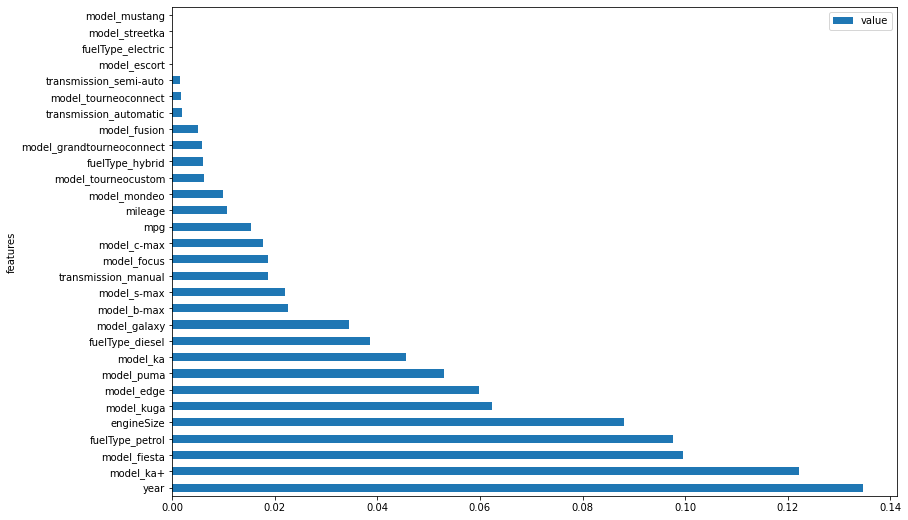

In [59]:
feat_import.plot.barh(x ='features', figsize=(13, 9))

**Let's create a dataframe with the attributes and their values, sort them in descending order. `Model_mustang`, `model_escort`, `fuelType_electric`, `model_streetka` didn't bring anything to our training.**  
  
**Let's remove the signs with a small value and perform a regression analysis again**    

In [60]:
print(list(feat_import.features))

['year', 'model_ka+', 'model_fiesta', 'fuelType_petrol', 'engineSize', 'model_kuga', 'model_edge', 'model_puma', 'model_ka', 'fuelType_diesel', 'model_galaxy', 'model_b-max', 'model_s-max', 'transmission_manual', 'model_focus', 'model_c-max', 'mpg', 'mileage', 'model_mondeo', 'model_tourneocustom', 'fuelType_hybrid', 'model_grandtourneoconnect', 'model_fusion', 'transmission_automatic', 'model_tourneoconnect', 'transmission_semi-auto', 'model_escort', 'fuelType_electric', 'model_streetka', 'model_mustang']


**Let's take those signs where the value is less than 0.01**

In [61]:
X = data.drop(['price', 'model_transittourneo', 'model_grandc-max', 'model_ecosport', 'tax', 'model_ranger', 'model_c-max',
 'transmission_manual',
 'model_grandtourneoconnect',
 'model_tourneocustom',
 'fuelType_hybrid',
 'model_fusion',
 'model_tourneoconnect',
 'transmission_automatic',
 'transmission_semi-auto',
 'model_mustang',
 'model_escort',
 'fuelType_electric',
 'model_streetka'], axis=1)
y = data.price
model_OLS_2 = sm.OLS(y, X).fit()
print(model_OLS_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.875e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:40:59   Log-Likelihood:                     -1.5768e+05
No. Observations:               17634   AIC:                                  3.154e+05
Df Residuals:                   17617   BIC:                                  3.155e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [62]:
print('R-squared', model_OLS.rsquared)
print('Adj. R-squared', model_OLS.rsquared_adj)

R-squared 0.8493517963468167
Adj. R-squared 0.8491121968181436


In [63]:
print('R-squared', model_OLS_2.rsquared)
print('Adj. R-squared', model_OLS_2.rsquared_adj)

R-squared 0.9791845889642671
Adj. R-squared 0.9791645025711464


**<li>Up to `XGBRegressor` the result is `R-squared` 0.849**
**<li>after learning on the `XGBRegressor` algorithm and removing weak features - `R-squared` 0.979**